# iFood Data Analyst Case
## by Jean Carlos da Cruz
cruzjeanc@gmail.com - https://www.linkedin.com/in/jeanccruz1/

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Gather</a></li>
<li><a href="#assess">Assess</a></li>
<li><a href="#clean">Clean</a></li>
<li><a href="#analysis">EDA (Exploratory Data Analysis)</a></li>
<ol>
<li><a href="#dist_ages">What is the distribution of ages in the dataset?</a></li>  
<li><a href="#Marital_Status">What kind of Marital_Status has more purchases?</a></li>
<li><a href="#Education_Purchases">What kind of Education has more purchases?</a></li>
<li><a href="#Marital_amount">What kind of Marital_Status spends more on purchases?</a></li>
<li><a href="#Education_amount">What kind of Education spends more on purchases?</a></li>
<li><a href="#Pred_Prod">Is there any predominant Product by amount purchased?</a></li>
<li><a href="#Pred_Channel">Is there any predominant Sales Channel by number of purchases?</a></li>    
</ol>   
<li><a href="#segmentation">Customer Segmentation</a></li>
<li><a href="#classification">Predictive Model (Classification)</a></li>      
</ul>   

<a id='intro'></a>
## Introduction
> A well-established company operating in the retail food sector. Presently they have around several hundred thousand registered customers and serve almost one million consumers a year. Globally, the company had solid revenues and a healthy bottom line in the past 3 years, but the profit growth perspectives for the next 3 years are not promising... For this reason, several strategic initiatives are being considered to invert this situation. One is to improve the performance of marketing activities, with a special focus on marketing campaigns.The objective here is to build a predictive model that will produce the highest profit for the next direct marketing campaign, scheduled for the next month. The new campaign, aims at selling a new gadget to the Customer Database. To build the model, a pilot campaign involving 2.240 customers was carried out. The customers were selected at random and contacted by phone regarding the acquisition of the gadget. During the following months, customers who bought the offer were properly labeled.

### The Data
> The data set contains socio-demographic and firmographic features about 2.240 customers who were contacted. Additionally, it contains a flag for those customers who responded the campaign, by buying the product.

In [ ]:
#Getting all the libraries we will need in this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import timeit
import glob
from datetime import date
import squarify 
pd.set_option('display.max_columns', 500)

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

<a id='gather'></a>
## Gather

#### Data Gathering
1. socio-demographic and firmographic features about 2.240 customers who were contacted

In [ ]:
#Getting the data into a dataframe
df_work = pd.read_csv('ml_project1_data.csv')

In [ ]:
#Copying the dataframe
df=df_work.copy()

<a id='assess'></a>
## Assess

In [ ]:
#Getting the first 5 rows
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
# Checking the datatypes of the columns
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [ ]:
#Checking the dimensions of the dataframe
df.shape

(2240, 29)

In [ ]:
#Checking the number of unique values in each column
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [ ]:
#Checking for nulls in the dataset
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

#### There is 24 null Income informations in the dataset.

In [ ]:
#Checking for duplicates in the data
df.duplicated().sum()

0

In [ ]:
#Checking infomation on datatypes of columns and missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
#Checking summary statistics
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
#Cheking the Year_Birth
df.Year_Birth.value_counts().sort_index()

1893     1
1899     1
1900     1
1940     1
1941     1
1943     7
1944     7
1945     8
1946    16
1947    16
1948    21
1949    30
1950    29
1951    43
1952    52
1953    35
1954    50
1955    49
1956    55
1957    43
1958    53
1959    51
1960    49
1961    36
1962    44
1963    45
1964    42
1965    74
1966    50
1967    44
1968    51
1969    71
1970    77
1971    87
1972    79
1973    74
1974    69
1975    83
1976    89
1977    52
1978    77
1979    53
1980    39
1981    39
1982    45
1983    42
1984    38
1985    32
1986    42
1987    27
1988    29
1989    30
1990    18
1991    15
1992    13
1993     5
1994     3
1995     5
1996     2
Name: Year_Birth, dtype: int64

#### Looks like there is someone that the Year_Birth is 1893... Looks weird!

In [ ]:
#Cheking the Education
df.Education.value_counts().sort_index()

2n Cycle       203
Basic           54
Graduation    1127
Master         370
PhD            486
Name: Education, dtype: int64

In [ ]:
#Cheking the Marital_Status
df.Marital_Status.value_counts().sort_index()

Absurd        2
Alone         3
Divorced    232
Married     864
Single      480
Together    580
Widow        77
YOLO          2
Name: Marital_Status, dtype: int64

In [ ]:
#Cheking the Teenhome
df.Teenhome.value_counts().sort_index()

0    1158
1    1030
2      52
Name: Teenhome, dtype: int64

In [ ]:
#Cheking the Kidhome
df.Kidhome.value_counts().sort_index()

0    1293
1     899
2      48
Name: Kidhome, dtype: int64

In [ ]:
##Creating a dataset with only the continuous variables
col = ['Income', 'Recency' , 'MntWines' , 'MntFruits' , 'MntMeatProducts' , 'MntFishProducts',  'MntSweetProducts' , 'MntGoldProds' , 
       'NumDealsPurchases' , 'NumWebPurchases' , 'NumCatalogPurchases' , 'NumStorePurchases' , 'NumWebVisitsMonth' , 'Z_CostContact' , 'Z_Revenue']
df_continuous = df[col]

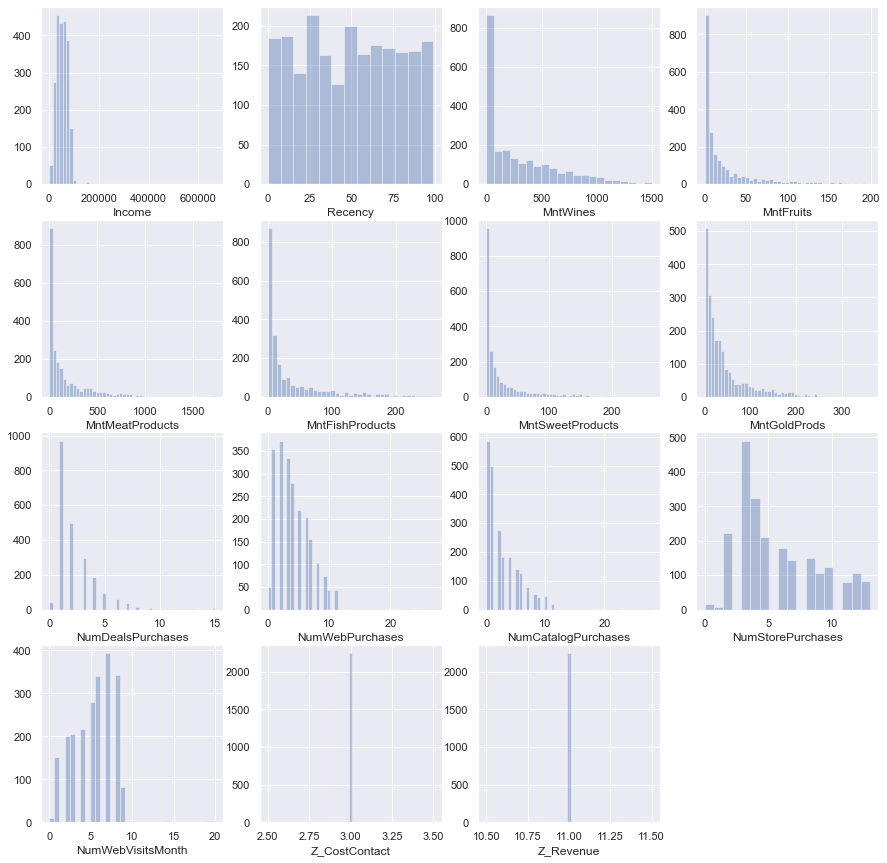

In [ ]:
#Checking the distribution of continuous features
plt.figure(figsize=(15, 15))
sns.set(style="darkgrid")
for i,c in enumerate(col):
  plt.subplot(4, 4, i+1)  
  sns.distplot(kkkk[c], kde=False, rug=False)

#### Looks like Z_CostContact and Z_Revenue are constant and are no information regarding what those numbers are. So we are not using both variables further on

<a id='clean'></a>
## Clean

#### Cleaning Steps:
<ul>
<li> 1. Change the date format from int to str in Change the date format from int to str in Year_Birth, Kidhome, Teenhome, Complain, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1 and  AcceptedCmp2 columns;</li>
<li> 2. Remove rows with null income information;</li>
<li> 3. Remove the Z_CostContact and Z_Revenue columns;</li>
<li> 4. Remove the MntGoldProds that won't be further used since its a sum of some products.
<li> 5. Remove the NumDealsPurchases that won't be further used since it is a number of purchases that had some discount but the dataset did not tell which kind of channel or product had discount.    

In [ ]:
#1. Change the date format from int to str in Change the date format from int to str in ID, Year_Birth, Kidhome, Teenhome, Complain, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1 and  AcceptedCmp2 columns
df['ID'] = df['ID'].astype(str)
df['Year_Birth'] = df['Year_Birth'].astype(str)
df['Kidhome'] = df['Kidhome'].astype(str)
df['Teenhome'] = df['Teenhome'].astype(str)
df['Complain'] = df['Complain'].astype(str)
df['AcceptedCmp3'] = df['AcceptedCmp3'].astype(str)
df['AcceptedCmp4'] = df['AcceptedCmp4'].astype(str)
df['AcceptedCmp5'] = df['AcceptedCmp5'].astype(str)
df['AcceptedCmp1'] = df['AcceptedCmp1'].astype(str)
df['AcceptedCmp2'] = df['AcceptedCmp2'].astype(str)
#Checking again the dtypes
df.dtypes

ID                      object
Year_Birth              object
Education               object
Marital_Status          object
Income                 float64
Kidhome                 object
Teenhome                object
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3            object
AcceptedCmp4            object
AcceptedCmp5            object
AcceptedCmp1            object
AcceptedCmp2            object
Complain                object
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [ ]:
#2. Remove rows with null income information;
df = df.dropna()

In [ ]:
#3. Remove the Z_CostContact and Z_Revenue columns;
deleted_columns = [ 'Z_CostContact', 'Z_Revenue' ]
# Dropping the columns from the dataframe
df.drop(deleted_columns, axis=1, inplace=True)

In [ ]:
#4. Remove the MntGoldProds that won't be further used since its a sum of some products.
deleted_columns_2 = [ 'MntGoldProds' ]
# Dropping the columns from the dataframe
df.drop(deleted_columns_2, axis=1, inplace=True)

In [ ]:
#5. Remove the NumDealsPurchases that won't be further used since it is a number of purchases that had some discount but the dataset did not tell which kind of channel or product had discount.  
deleted_columns_3 = [ 'NumDealsPurchases' ]
# Dropping the columns from the dataframe
df.drop(deleted_columns_3, axis=1, inplace=True)

In [ ]:
#Checking the final dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   object 
 1   Year_Birth           2216 non-null   object 
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   object 
 6   Teenhome             2216 non-null   object 
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  NumWebPurchases      2216 non-null   int64  
 15  NumCatalogPurchases  2216 non-null   i

<a id='analysis'></a>
## EDA (Exploratory Data Analysis)

<a id='dist_ages'></a>
### 1. What is the distribution of ages in the dataset?
> After removing some outliers (3 Users with more than 120 years). From total 2213 users, the average age of users in dataset is 52 years, with the minimum age being 25 and the maximum 81 years.

In [ ]:
#Creating the Age column
df['Age'] = date.today().year - df['Year_Birth'].astype(int)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,8,10,4,7,0,0,0,0,0,0,1,64
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,1,1,2,5,0,0,0,0,0,0,0,67
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,8,2,10,4,0,0,0,0,0,0,0,56
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,2,0,4,6,0,0,0,0,0,0,0,37
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,5,3,6,5,0,0,0,0,0,0,0,40


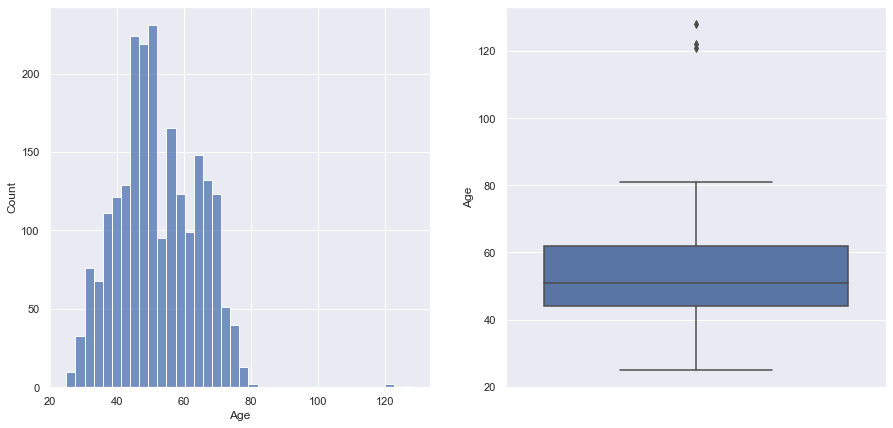

In [ ]:
#Plotting the Distribution of Ages
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data=df, x="Age", ax=ax[0])
sns.boxplot(y='Age', data=df, ax=ax[1])
fig.show()

In [ ]:
#Getting the users with age higher than 120
df_higher_120 = df.query("Age >= 120")
df_higher_120

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,2,1,2,5,0,0,0,0,0,1,0,121
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,1,0,2,4,0,0,0,0,0,0,0,128
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,4,6,4,1,0,0,1,0,0,0,0,122


In [ ]:
df['Age'].describe()

count    2216.000000
mean       52.179603
std        11.985554
min        25.000000
25%        44.000000
50%        51.000000
75%        62.000000
max       128.000000
Name: Age, dtype: float64

#### By the distribution of Ages in our dataset we can see that most of our data relies on ages from 20 to 80. The average Age is 52 years, the mininum age is 25 and the oldest is 128. About those really old users we have 3 users that have more than 120 years old. Since I don't know if there is some problem in the data or this is the actual data of those users I will remove them from now on since they are outliers in our data. 

In [ ]:
#Removing the users with age higher than 120 years
df = df.query("Age < 120")

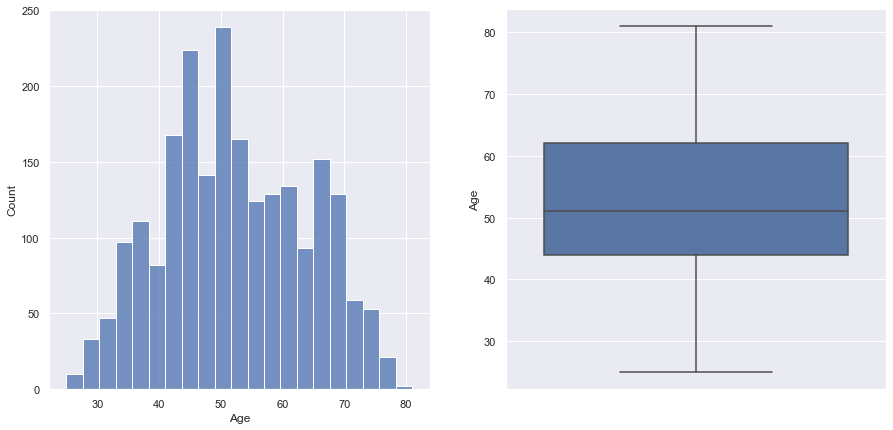

In [ ]:
#Plotting the Distribution of Ages again after removinf the outliers
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data=df, x="Age", ax=ax[0])
sns.boxplot(y='Age', data=df, ax=ax[1])
fig.show()

In [ ]:
df['Age'].describe()

count    2213.000000
mean       52.082693
std        11.700216
min        25.000000
25%        44.000000
50%        51.000000
75%        62.000000
max        81.000000
Name: Age, dtype: float64

#### After removing the outliers the average did not change much, still a little above 52 years. But now our max Age is 81, which makes more sense.

<a id='Marital_Status'></a>
### 2. What kind of Marital_Status has more purchases in total?
> Married users is the group with more purchases among all others. Actually, people that are somehow together are listed as the second one when it comes to purchases. So we can assume that in general people in a relantionship make more purchases.

In [ ]:
#Creating a column summing the total purchases
df['Total_Purchases'] = df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']

In [ ]:
#Grouping data by Marital_Status
df_marital_status = df.groupby('Marital_Status')['Total_Purchases'].sum().reset_index()
df_marital_status2 = df_marital_status.sort_values(by=['Total_Purchases'], ascending=False)
df_marital_status2

,Marital_Status,Total_Purchases
3,Married,10768
5,Together,7170
4,Single,5725
2,Divorced,2965
6,Widow,1085
0,Absurd,35
1,Alone,29
7,YOLO,28


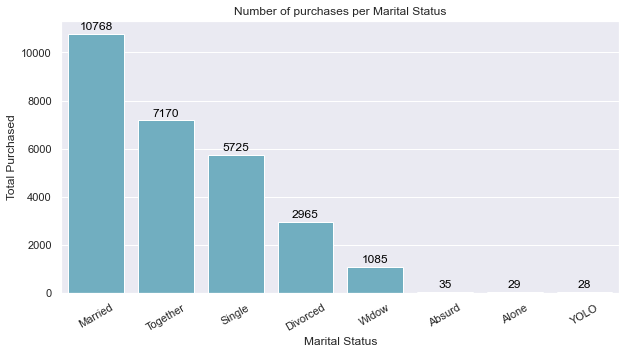

In [ ]:
#Ploting the results in a bar chart
f,ax = plt.subplots(figsize=(10, 5))
chart = sns.barplot(x='Marital_Status', y='Total_Purchases' , data=df_marital_status2, color='c')
chart.set(title='Number of purchases per Marital Status', xlabel='Marital Status', ylabel="Total Purchased")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)
# Getting Labels
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 7),
                 textcoords='offset points')
plt.show()

#### Married users is the group with more purchases among all others. Actually, people that are somehow together are listed as the second one when it comes to purchases. So we can assume that in general people in a relantionship make more purchases.

<a id='Education_Purchases'></a>
### 3. What kind of Education has more purchases in total?
> When it comes to Number of purchases per education degree, people that are marked as Graduation have the highest number of purchases.

In [ ]:
#Grouping data by Education
df_education = df.groupby('Education')['Total_Purchases'].sum().reset_index()
df_education2 = df_education.sort_values(by=['Total_Purchases'], ascending=False)
df_education2

,Education,Total_Purchases
2,Graduation,14168
4,PhD,6476
3,Master,4551
0,2n Cycle,2328
1,Basic,282


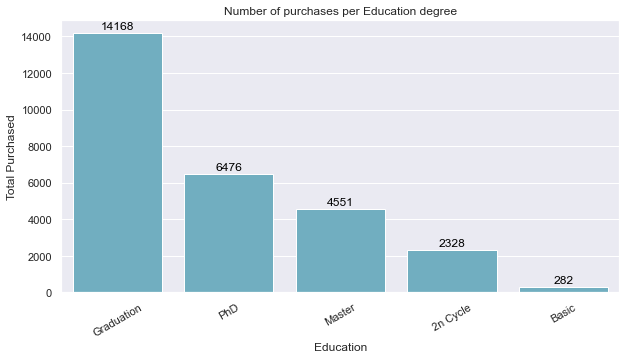

In [ ]:
#Ploting the results in a bar chart
f,ax = plt.subplots(figsize=(10, 5))
chart = sns.barplot(x='Education', y='Total_Purchases' , data=df_education2, color='c')
chart.set(title='Number of purchases per Education degree', xlabel='Education', ylabel="Total Purchased")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)
# Getting Labels
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 7),
                 textcoords='offset points')
plt.show()

#### When it comes to Number of purchases per education degree, people that are marked as Graduation have the highest number of purchases. But when considering this result with the last one regarding the Marital Status. This groups that have more purchases are also the ones that have the highest number of users in the dataset? Let's check!!!

## This groups that have more purchases are also the ones that have the highest number of users in the dataset???
>As expected the groups with more purchases when it comes to Education and Marital Status are also the ones with the highest number of users. So in order to have more accurate results we should consider number of purchases per user instead of total.

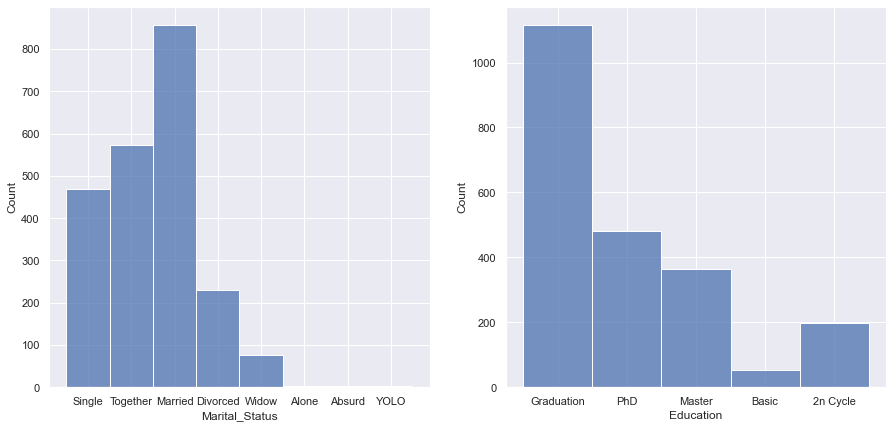

In [ ]:
#Plotting the Distribution of Marital Status and Education
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data=df, x="Marital_Status", ax=ax[0])
sns.histplot(data=df, x="Education", ax=ax[1])
fig.show()

#### As expected the groups with more purchases when it comes to Education and Marital Status are also the ones with the highest number of users. So in order to have more accurate results we should consider number of purchases per user instead of total. Let's do it!

In [ ]:
#Creating a new dataset with purchases per user
df_filtered = df[['ID', 'Education', 'Marital_Status' , 'Total_Purchases']].copy()
df_filtered.head()

,ID,Education,Marital_Status,Total_Purchases
0,5524,Graduation,Single,22
1,2174,Graduation,Single,4
2,4141,Graduation,Together,20
3,6182,Graduation,Together,6
4,5324,PhD,Married,14


In [ ]:
#Grouping the results by Education
df_education_grouped = df_filtered.groupby('Education').agg({'Total_Purchases':'sum', 'ID': 'count'}).reset_index().rename(columns={'ID':'ID_Count'})
df_education_grouped['Purchases_per_user'] = (df_education_grouped['Total_Purchases']/df_education_grouped['ID_Count']).apply(lambda x:round(x,0))
df_education_grouped2 = df_education_grouped.sort_values(by=['Purchases_per_user'], ascending=False)
df_education_grouped2.head()

,Education,Total_Purchases,ID_Count,Purchases_per_user
2,Graduation,14168,1116,13.0
4,PhD,6476,480,13.0
0,2n Cycle,2328,198,12.0
3,Master,4551,365,12.0
1,Basic,282,54,5.0


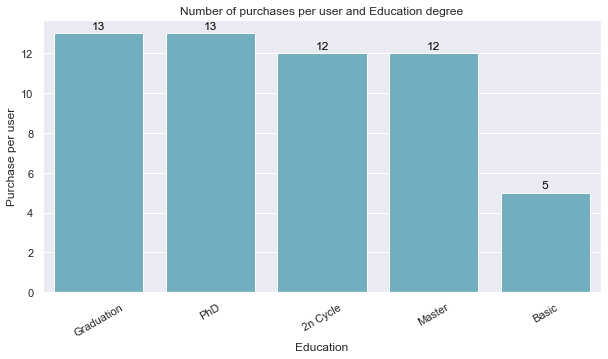

In [ ]:
#Ploting the results in a bar chart
f,ax = plt.subplots(figsize=(10, 5))
chart = sns.barplot(x='Education', y='Purchases_per_user' , data=df_education_grouped2, color='c')
chart.set(title='Number of purchases per user and Education degree', xlabel='Education', ylabel="Purchase per user")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)
# Getting Labels
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 7),
                 textcoords='offset points')
plt.show()

#### Now the results are pretty different and make more sense. Users marked as Graduation still have the highest number of purchases made, but other groups are now showing similar results. Only users in Basic Group have small number or purchases per user when compared to others. Let's see if we get the same outcome regarding Marital Status!

In [ ]:
#Grouping the results by Marital_Status
df_marital_grouped = df_filtered.groupby('Marital_Status').agg({'Total_Purchases':'sum', 'ID': 'count'}).reset_index().rename(columns={'ID':'ID_Count'})
df_marital_grouped['Purchases_per_user'] = (df_marital_grouped['Total_Purchases']/df_marital_grouped['ID_Count']).apply(lambda x:round(x,0))
df_marital_grouped2 = df_marital_grouped.sort_values(by=['Purchases_per_user'], ascending=False)
df_marital_grouped2.head()

,Marital_Status,Total_Purchases,ID_Count,Purchases_per_user
0,Absurd,35,2,18.0
6,Widow,1085,76,14.0
7,YOLO,28,2,14.0
2,Divorced,2965,231,13.0
3,Married,10768,857,13.0


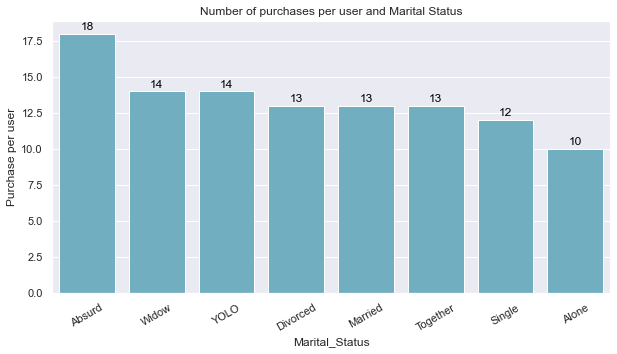

In [ ]:
#Ploting the results in a bar chart
f,ax = plt.subplots(figsize=(10, 5))
chart = sns.barplot(x='Marital_Status', y='Purchases_per_user' , data=df_marital_grouped2, color='c')
chart.set(title='Number of purchases per user and Marital Status', xlabel='Marital_Status', ylabel="Purchase per user")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)
# Getting Labels
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 7),
                 textcoords='offset points')
plt.show()

### Now the results are totally different than before. I have no idea what a Absurd Marital Status means but they are in our dataset the ones with the highest number of purchases per user. Of course the sample size is not big enough to make any conclusions (only 2 users) we should dig deeper into this to see if this group has any potential. All other Marital Status have pretty similar number of purchases per user.

<a id='Marital_amount'></a>
### 4. What kind of Marital_Status spends more on purchases?
>Once again this Absurd Marital Status (Still no idea what that means!!!) have the highest amount spent among all other groups. Still we need to take into consideration that the sample size is quite small. The second group with the highest spend is the Widow group. Maybe afther their loss they have more money or time to buy products? This could be interesting to dig deep.

Since we already know that makes more sense to compare groups using the metrics per user I will use it as standard.

In [ ]:
#Creating a column summing the total amount spent
df['Total_Mnt_Spent'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']

In [ ]:
#Creating a new dataset with purchases per user
df_filtered2 = df[['ID', 'Education', 'Marital_Status' , 'Total_Mnt_Spent']].copy()
df_filtered2.head()

,ID,Education,Marital_Status,Total_Mnt_Spent
0,5524,Graduation,Single,1529
1,2174,Graduation,Single,21
2,4141,Graduation,Together,734
3,6182,Graduation,Together,48
4,5324,PhD,Married,407


In [ ]:
#Grouping the results by Marital_Status
df_marital_mnt_spent = df_filtered2.groupby('Marital_Status').agg({'Total_Mnt_Spent':'sum', 'ID': 'count'}).reset_index().rename(columns={'ID':'ID_Count'})
df_marital_mnt_spent['Mnt_per_user'] = (df_marital_mnt_spent['Total_Mnt_Spent']/df_marital_mnt_spent['ID_Count']).apply(lambda x:round(x,0))
df_marital_mnt_spent2 = df_marital_mnt_spent.sort_values(by=['Mnt_per_user'], ascending=False)
df_marital_mnt_spent2.head()

,Marital_Status,Total_Mnt_Spent,ID_Count,Mnt_per_user
0,Absurd,1977,2,988.0
6,Widow,51080,76,672.0
4,Single,268114,470,570.0
2,Divorced,130887,231,567.0
5,Together,322486,572,564.0


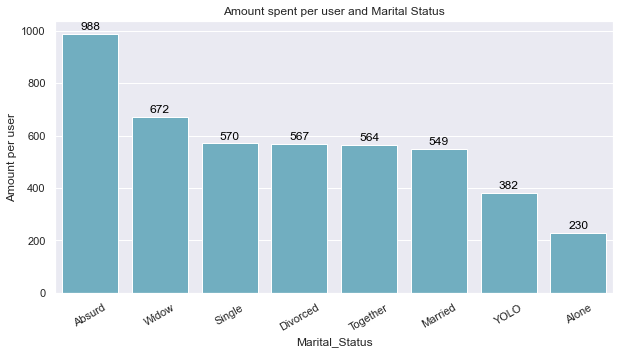

In [ ]:
#Ploting the results in a bar chart
f,ax = plt.subplots(figsize=(10, 5))
chart = sns.barplot(x='Marital_Status', y='Mnt_per_user' , data=df_marital_mnt_spent2, color='c')
chart.set(title='Amount spent per user and Marital Status', xlabel='Marital_Status', ylabel="Amount per user")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)
# Getting Labels
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 7),
                 textcoords='offset points')
plt.show()

### Once again this Absurd Marital Status (Still no idea what that means!!!) have the highest amount spent among all other groups. Still we need to take into consideration that the sample size is quite small. The second group with the highest spend is the Widow group. Maybe afther their loss they have more money or time to buy products? This could be interesting to dig deep.

<a id='Education_amount'></a>
### 5. What kind of Education spends more on purchases?
>Users with PhD spend more per user than other groups. Altough they don't have the highest number of purchases they have the highest amount, which means they are big spenders of our products. This means we should focus on them now on.

In [ ]:
#Grouping the results by Education
df_education_spent = df_filtered2.groupby('Education').agg({'Total_Mnt_Spent':'sum', 'ID': 'count'}).reset_index().rename(columns={'ID':'ID_Count'})
df_education_spent['Mnt_per_user'] = (df_education_spent['Total_Mnt_Spent']/df_education_spent['ID_Count']).apply(lambda x:round(x,0))
df_education_spent2 = df_education_spent.sort_values(by=['Mnt_per_user'], ascending=False)
df_education_spent2.head()

,Education,Total_Mnt_Spent,ID_Count,Mnt_per_user
4,PhD,308294,480,642.0
2,Graduation,637239,1116,571.0
3,Master,207896,365,570.0
0,2n Cycle,89550,198,452.0
1,Basic,3184,54,59.0


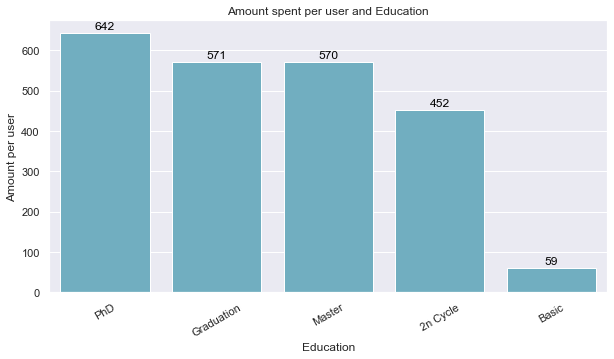

In [ ]:
#Ploting the results in a bar chart
f,ax = plt.subplots(figsize=(10, 5))
chart = sns.barplot(x='Education', y='Mnt_per_user' , data=df_education_spent2, color='c')
chart.set(title='Amount spent per user and Education', xlabel='Education', ylabel="Amount per user")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)
# Getting Labels
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 7),
                 textcoords='offset points')
plt.show()

### Users with PhD spend more per user than other groups. Altough they don't have the highest number of purchases they have the highest amount, which means they are big spenders of our products. This means we should focus on them now on. 

<a id='Pred_Prod'></a>
### 6. Is there any predominant Product by amount purchased?
>Users within this dataset really like our wines. The amount spent on Wines is almost twice the spent on the second product which is meat. Is it Wine our main product when it comes to marketing? I don't know but people seens to like it!!!

In [ ]:
#Creating new dataset to be used in the section
df_product = df[['ID', 'MntWines', 'MntFruits' , 'MntMeatProducts' , 'MntFishProducts' , 'MntSweetProducts' ]].copy()
df_product.head()

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
0,5524,635,88,546,172,88
1,2174,11,1,6,2,1
2,4141,426,49,127,111,21
3,6182,11,4,20,10,3
4,5324,173,43,118,46,27


In [ ]:
#Unpivoting the columns into rows
df_product_melted = df_product.melt(id_vars=["ID"], 
        var_name=["Product"], 
        value_name="Amount_Spent")
df_product_melted.head(5)

,ID,Product,Amount_Spent
0,5524,MntWines,635
1,2174,MntWines,11
2,4141,MntWines,426
3,6182,MntWines,11
4,5324,MntWines,173


In [ ]:
df_product_melted.shape[0]

11065

In [ ]:
#Grouping the results by Product
df_Product_spent = df_product_melted.groupby('Product').agg({'Amount_Spent':'sum', 'ID': 'count'}).reset_index().rename(columns={'ID':'ID_Count'})
df_Product_spent['Mnt_per_user'] = (df_Product_spent['Amount_Spent']/df_Product_spent['ID_Count']).apply(lambda x:round(x,0))
df_Product_spent2 = df_Product_spent.sort_values(by=['Amount_Spent'], ascending=False)
df_Product_spent2.head()

,Product,Amount_Spent,ID_Count,Mnt_per_user
4,MntWines,675305,2213,305.0
2,MntMeatProducts,369488,2213,167.0
0,MntFishProducts,83287,2213,38.0
3,MntSweetProducts,59828,2213,27.0
1,MntFruits,58255,2213,26.0


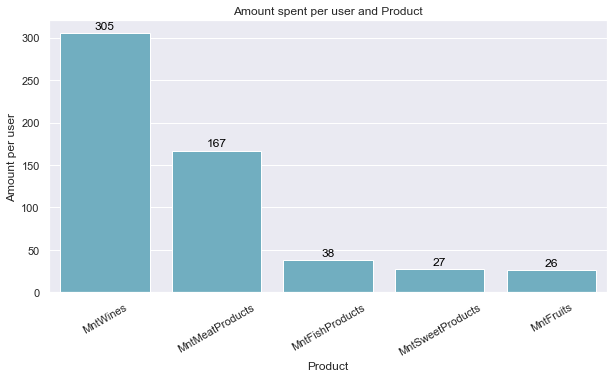

In [ ]:
#Ploting the results in a bar chart
f,ax = plt.subplots(figsize=(10, 5))
chart = sns.barplot(x='Product', y='Mnt_per_user' , data=df_Product_spent2, color='c')
chart.set(title='Amount spent per user and Product', xlabel='Product', ylabel="Amount per user")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)
# Getting Labels
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 7),
                 textcoords='offset points')
plt.show()

### Users within this dataset really like our wines. The amount spent on Wines is almost twice the spent on the second product which is meat. Is it Wine our main product when it comes to marketing? I don't know but people seens to like it!!!

<a id='Pred_Channel'></a>
### 7. Is there any predominant Sales Channel by number of purchases?
>Probabily this dataset it is from before pandemic, the number of Store Purchases per user is 50% higher than Web's.

In [ ]:
#Creating new dataset to be used in the section
df_channel = df[['ID', 'NumWebPurchases', 'NumCatalogPurchases' , 'NumStorePurchases']].copy()
df_channel.head()

,ID,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,5524,8,10,4
1,2174,1,1,2
2,4141,8,2,10
3,6182,2,0,4
4,5324,5,3,6


In [ ]:
#Unpivoting the columns into rows
df_channel_melted = df_channel.melt(id_vars=["ID"], 
        var_name=["Channel"], 
        value_name="Num_Purchases")
df_channel_melted.head(5)

,ID,Channel,Num_Purchases
0,5524,NumWebPurchases,8
1,2174,NumWebPurchases,1
2,4141,NumWebPurchases,8
3,6182,NumWebPurchases,2
4,5324,NumWebPurchases,5


In [ ]:
df_channel_melted.shape[0]

6639

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Purchases,Total_Mnt_Spent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,8,10,4,7,0,0,0,0,0,0,1,64,22,1529
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,1,1,2,5,0,0,0,0,0,0,0,67,4,21
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,8,2,10,4,0,0,0,0,0,0,0,56,20,734
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,2,0,4,6,0,0,0,0,0,0,0,37,6,48
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,5,3,6,5,0,0,0,0,0,0,0,40,14,407


In [ ]:
#Grouping the results by Channel
df_Channel_spent = df_channel_melted.groupby('Channel').agg({'Num_Purchases':'sum', 'ID': 'count'}).reset_index().rename(columns={'ID':'ID_Count'})
df_Channel_spent['Purchases_per_user'] = (df_Channel_spent['Num_Purchases']/df_Channel_spent['ID_Count']).apply(lambda x:round(x,0))
df_Channel_spent2 = df_Channel_spent.sort_values(by=['Num_Purchases'], ascending=False)
df_Channel_spent2.head()

,Channel,Num_Purchases,ID_Count,Purchases_per_user
1,NumStorePurchases,12847,2213,6.0
2,NumWebPurchases,9046,2213,4.0
0,NumCatalogPurchases,5912,2213,3.0


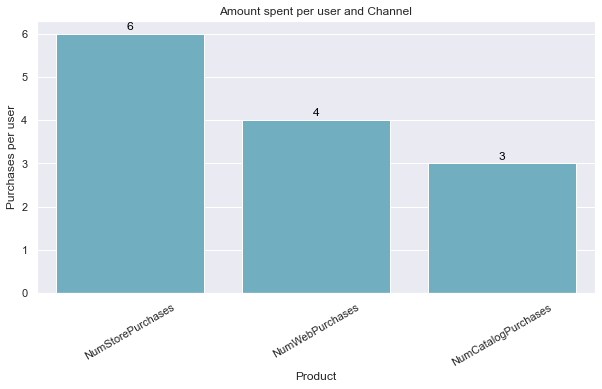

In [ ]:
#Ploting the results in a bar chart
f,ax = plt.subplots(figsize=(10, 5))
chart = sns.barplot(x='Channel', y='Purchases_per_user' , data=df_Channel_spent2, color='c')
chart.set(title='Amount spent per user and Channel', xlabel='Product', ylabel="Purchases per user")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30)
# Getting Labels
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 7),
                 textcoords='offset points')
plt.show()

### Probabily this dataset it is from before pandemic, the number of Store Purchases per user is 50% higher than Web's.

<a id='segmentation'></a>
## Customer Segmentation
> RFM (Recency, Frequency, Monetary) analysis is a behavior-based approach grouping customers into segments. It groups the customers on the basis of their previous purchase transactions. How recently, how often, and how much did a customer buy. RFM filters customers into various groups for the purpose of better service. It helps managers to identify potential customers to do more profitable business. There is a segment of customer who is the big spender but what if they purchased only once or how recently they purchased? Do they often purchase our product? Also, It helps managers to run an effective promotional campaign for personalized service. <br><br>
Recency (R): Who have purchased recently? Number of days since last purchase (least recency) <br><br> Frequency (F): Who has purchased frequently? It means the total number of purchases. ( high frequency) <br><br> Monetary Value(M): Who have high purchase amount? It means the total money customer spent (high monetary value) <br><br> More concepts on: https://www.optimove.com/resources/learning-center/rfm-segmentation  

In [ ]:
#Making a copy of the dataset
df_segmentation = df.copy()

In [ ]:
#Filtering the relevant columns
df_segmentation_filter = df_segmentation[['ID' , 'Recency' , 'Total_Purchases' , 'Total_Mnt_Spent']]

In [ ]:
df_segmentation_filter.head()

,ID,Recency,Total_Purchases,Total_Mnt_Spent
0,5524,58,22,1529
1,2174,38,4,21
2,4141,26,20,734
3,6182,26,6,48
4,5324,94,14,407


#### Customers with the lowest recency, highest Total_Purchases and Total_Mnt_Spent will be considered as our top customers.
> qcut() is Quantile-based discretization function. qcut bins the data based on sample quantiles. For example, 1000 values for 4 quantiles would produce a categorical object indicating quantile membership for each customer.

In [ ]:
#Calculating the Quantile of RFM Values
df_segmentation_filter['Recency_quartile'] = pd.qcut(df_segmentation_filter['Recency'], 4, ['1','2','3','4'])
df_segmentation_filter['Total_Purchases_quartile'] = pd.qcut(df_segmentation_filter['Total_Purchases'], 4, ['4','3','2','1'])
df_segmentation_filter['Total_Mnt_Spent_quartile'] = pd.qcut(df_segmentation_filter['Total_Mnt_Spent'], 4, ['4','3','2','1'])
df_segmentation_filter.head(5)

,ID,Recency,Total_Purchases,Total_Mnt_Spent,Recency_quartile,Total_Purchases_quartile,Total_Mnt_Spent_quartile
0,5524,58,22,1529,3,1,1
1,2174,38,4,21,2,4,4
2,4141,26,20,734,2,1,2
3,6182,26,6,48,2,4,4
4,5324,94,14,407,4,2,2


In [ ]:
#Combining all quartiles into a single column
df_segmentation_filter['RFM_Score'] = df_segmentation_filter.Recency_quartile.astype(str)+ df_segmentation_filter.Total_Purchases_quartile.astype(str) + df_segmentation_filter.Total_Mnt_Spent_quartile.astype(str)
df_segmentation_filter.head()

,ID,Recency,Total_Purchases,Total_Mnt_Spent,Recency_quartile,Total_Purchases_quartile,Total_Mnt_Spent_quartile,RFM_Score
0,5524,58,22,1529,3,1,1,311
1,2174,38,4,21,2,4,4,244
2,4141,26,20,734,2,1,2,212
3,6182,26,6,48,2,4,4,244
4,5324,94,14,407,4,2,2,422


In [ ]:
#Checking the number of Scores we have so far
df_segmentation_filter.RFM_Score.nunique()

47

The RFM_Score is defined by the concatenate of the three quartiles. But we end up with 47 that is a pretty big number when it comes to segments. Let's reduce this number by summing the scores!

In [ ]:
#Creating a second RFM_Score by summing our scores into a single number
df_segmentation_filter['RFM_Score_2'] = df_segmentation_filter.Recency_quartile.astype(int)+ df_segmentation_filter.Total_Purchases_quartile.astype(int) + df_segmentation_filter.Total_Mnt_Spent_quartile.astype(int)
df_segmentation_filter.head()

,ID,Recency,Total_Purchases,Total_Mnt_Spent,Recency_quartile,Total_Purchases_quartile,Total_Mnt_Spent_quartile,RFM_Score,RFM_Score_2
0,5524,58,22,1529,3,1,1,311,5
1,2174,38,4,21,2,4,4,244,10
2,4141,26,20,734,2,1,2,212,5
3,6182,26,6,48,2,4,4,244,10
4,5324,94,14,407,4,2,2,422,8


In [ ]:
df_segmentation_filter.RFM_Score_2.nunique()

10

The second RFM_Score is defined by the sum of the three quartiles. Now we have 10 segments, which are still a lot. So we are going to create RFM_Levels. Defined as: <br>
**Can't Loose Them <br> Champions <br> Loyal <br> Needs Attention <br> 
Potential <br> Promising <br> Require Activation**

In [ ]:
#Checking each RFM_Score_2
df_segmentation_filter.RFM_Score_2.value_counts().sort_index()

3      73
4     206
5     259
6     290
7     306
8     224
9     263
10    292
11    162
12    138
Name: RFM_Score_2, dtype: int64

In [ ]:
#Defining RFM Levels based on RFM_Score_2
def rfm_level(df_segmentation_filter):
    if df_segmentation_filter['RFM_Score_2'] == 3:
        return 'Can\'t Loose Them'
    elif ((df_segmentation_filter['RFM_Score_2'] >= 4) & (df_segmentation_filter['RFM_Score_2'] < 5)):
        return 'Champions'
    elif ((df_segmentation_filter['RFM_Score_2'] >= 5) & (df_segmentation_filter['RFM_Score_2'] < 7)):
        return 'Loyal'
    elif ((df_segmentation_filter['RFM_Score_2'] >= 7) & (df_segmentation_filter['RFM_Score_2'] < 9)):
        return 'Potential'
    elif ((df_segmentation_filter['RFM_Score_2'] >= 9) & (df_segmentation_filter['RFM_Score_2'] < 10)):
        return 'Promising'
    elif ((df_segmentation_filter['RFM_Score_2'] >= 10) & (df_segmentation_filter['RFM_Score_2'] < 12)):
        return 'Needs Attention'
    else:
        return 'Require Activation'

In [ ]:
# Create a new variable RFM_Level
df_segmentation_filter['RFM_Level'] = df_segmentation_filter.apply(rfm_level, axis=1)
df_segmentation_filter.head()

,ID,Recency,Total_Purchases,Total_Mnt_Spent,Recency_quartile,Total_Purchases_quartile,Total_Mnt_Spent_quartile,RFM_Score,RFM_Score_2,RFM_Level
0,5524,58,22,1529,3,1,1,311,5,Loyal
1,2174,38,4,21,2,4,4,244,10,Needs Attention
2,4141,26,20,734,2,1,2,212,5,Loyal
3,6182,26,6,48,2,4,4,244,10,Needs Attention
4,5324,94,14,407,4,2,2,422,8,Potential


In [ ]:
#Summary for each RFM_Level
rfm_level_agg = df_segmentation_filter.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Total_Purchases': 'mean',
    'Total_Mnt_Spent': ['mean', 'count'],
    'RFM_Score_2' : 'mean'
}).round(1)

rfm_level_agg

Recency Total_Purchases Total_Mnt_Spent       RFM_Score_2
                      mean            mean            mean count        mean
RFM_Level                                                                   
Can't Loose Them      12.3            22.6          1429.6    73         3.0
Champions             21.0            20.6          1211.0   206         4.0
Loyal                 49.9            19.0          1040.0   549         5.5
Needs Attention       61.3             5.5            70.0   454        10.4
Potential             50.9            12.6           483.8   530         7.4
Promising             35.2             6.4           109.2   263         9.0
Require Activation    85.2             4.3            32.4   138        12.0

In [ ]:
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count' , 'RFM_Score']

In [ ]:
df_rfm_level_agg = rfm_level_agg.reset_index()
df_rfm_level_agg

,RFM_Level,RecencyMean,FrequencyMean,MonetaryMean,Count,RFM_Score
0,Can't Loose Them,12.3,22.6,1429.6,73,3.0
1,Champions,21.0,20.6,1211.0,206,4.0
2,Loyal,49.9,19.0,1040.0,549,5.5
3,Needs Attention,61.3,5.5,70.0,454,10.4
4,Potential,50.9,12.6,483.8,530,7.4
5,Promising,35.2,6.4,109.2,263,9.0
6,Require Activation,85.2,4.3,32.4,138,12.0


In [ ]:
df_rfm_level_agg['Total_Users'] = df_rfm_level_agg['Count'].sum()
df_rfm_level_agg['%_of_total'] = df_rfm_level_agg['Count']/df_rfm_level_agg['Total_Users']
df_rfm_level_agg['%_of_total'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df_rfm_level_agg['%_of_total']], index = df_rfm_level_agg.index)
df_rfm_level_agg

,RFM_Level,RecencyMean,FrequencyMean,MonetaryMean,Count,RFM_Score,Total_Users,%_of_total
0,Can't Loose Them,12.3,22.6,1429.6,73,3.0,2213,3.30%
1,Champions,21.0,20.6,1211.0,206,4.0,2213,9.31%
2,Loyal,49.9,19.0,1040.0,549,5.5,2213,24.81%
3,Needs Attention,61.3,5.5,70.0,454,10.4,2213,20.52%
4,Potential,50.9,12.6,483.8,530,7.4,2213,23.95%
5,Promising,35.2,6.4,109.2,263,9.0,2213,11.88%
6,Require Activation,85.2,4.3,32.4,138,12.0,2213,6.24%


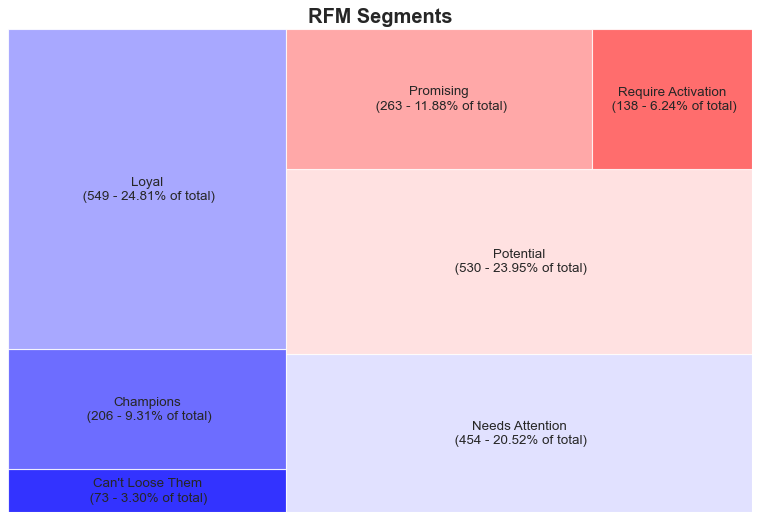

In [ ]:
#Creating a treemap to better see the results
labels = df_rfm_level_agg.apply(lambda x: str(x[0]) + "\n (" + str(x[4]) + " - " + str(x[7]) + " of total" ")" , axis=1)
sizes = df_rfm_level_agg['Count'].values.tolist()
colors = [plt.cm.bwr(i/float(len(df_rfm_level_agg['RFM_Score']))) for i in range(len(df_rfm_level_agg['RFM_Score']))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

### After the RFM Segmentation we endup with 7 segments for our clients, where 3.3% of them are reay good customers and we should not loose them. And we have 138 customers (6.24% of total) that require activation within our products and services.

<a id='classification'></a>
## Predictive Model (Classification)
> Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

In [ ]:
#Making a copy of the dataset
df_classification = df.copy()

In [ ]:
df_classification

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Purchases,Total_Mnt_Spent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,8,10,4,7,0,0,0,0,0,0,1,64,22,1529
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,1,1,2,5,0,0,0,0,0,0,0,67,4,21
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,8,2,10,4,0,0,0,0,0,0,0,56,20,734
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,2,0,4,6,0,0,0,0,0,0,0,37,6,48
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,5,3,6,5,0,0,0,0,0,0,0,40,14,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,9,3,4,5,0,0,0,0,0,0,0,54,16,1094
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,2,5,7,0,0,0,1,0,0,0,75,15,436
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,2,3,13,6,0,1,0,0,0,0,0,40,18,1217
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,6,5,10,3,0,0,0,0,0,0,0,65,21,782


In [ ]:
df_classification['Response'].value_counts()

0    1880
1     333
Name: Response, dtype: int64

In [ ]:
count_no_sub = len(df_classification[df_classification['Response']==0])
count_sub = len(df_classification[df_classification['Response']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("The Percentage of customers that their Response is positive in our dataset is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("The Percentage of customers that their Response is negative in our dataset is", pct_of_sub*100)

The Percentage of customers that their Response is positive in our dataset is 84.95255309534568
The Percentage of customers that their Response is negative in our dataset is 15.047446904654315


In [ ]:
df_classification.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2213 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2213 non-null   object 
 1   Year_Birth           2213 non-null   object 
 2   Education            2213 non-null   object 
 3   Marital_Status       2213 non-null   object 
 4   Income               2213 non-null   float64
 5   Kidhome              2213 non-null   object 
 6   Teenhome             2213 non-null   object 
 7   Dt_Customer          2213 non-null   object 
 8   Recency              2213 non-null   int64  
 9   MntWines             2213 non-null   int64  
 10  MntFruits            2213 non-null   int64  
 11  MntMeatProducts      2213 non-null   int64  
 12  MntFishProducts      2213 non-null   int64  
 13  MntSweetProducts     2213 non-null   int64  
 14  NumWebPurchases      2213 non-null   int64  
 15  NumCatalogPurchases  2213 non-null   i

Our Responses are imbalanced, and the ratio of no-response to response instances is 85:15. We will need to balance the classes further on.

In [ ]:
#Creating dummy variables to categorical information
cat_vars=['Education','Marital_Status']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df_classification[var], prefix=var)
    data1=df_classification.join(cat_list)
    df_classification=data1
cat_vars=['Education','Marital_Status']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [ ]:
df_classification.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Purchases,Total_Mnt_Spent,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,8,10,4,7,0,0,0,0,0,0,1,64,22,1529,0,0,1,0,0,0,0,0,0,1,0,0,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,1,1,2,5,0,0,0,0,0,0,0,67,4,21,0,0,1,0,0,0,0,0,0,1,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,8,2,10,4,0,0,0,0,0,0,0,56,20,734,0,0,1,0,0,0,0,0,0,0,1,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,2,0,4,6,0,0,0,0,0,0,0,37,6,48,0,0,1,0,0,0,0,0,0,0,1,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,5,3,6,5,0,0,0,0,0,0,0,40,14,407,0,0,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
#Cleaning the classification dataset by removing columns that won't be used
df_classification.drop(columns=['ID', 'Year_Birth' , 'Education' , 'Marital_Status' , 'Dt_Customer' , 'Total_Purchases' , 'Total_Mnt_Spent'], axis=1, inplace=True)
df_classification.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58138.0,0,0,58,635,88,546,172,88,8,10,4,7,0,0,0,0,0,0,1,64,0,0,1,0,0,0,0,0,0,1,0,0,0
1,46344.0,1,1,38,11,1,6,2,1,1,1,2,5,0,0,0,0,0,0,0,67,0,0,1,0,0,0,0,0,0,1,0,0,0
2,71613.0,0,0,26,426,49,127,111,21,8,2,10,4,0,0,0,0,0,0,0,56,0,0,1,0,0,0,0,0,0,0,1,0,0
3,26646.0,1,0,26,11,4,20,10,3,2,0,4,6,0,0,0,0,0,0,0,37,0,0,1,0,0,0,0,0,0,0,1,0,0
4,58293.0,1,0,94,173,43,118,46,27,5,3,6,5,0,0,0,0,0,0,0,40,0,0,0,0,1,0,0,0,1,0,0,0,0


In [ ]:
df_classification.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2213 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2213 non-null   float64
 1   Kidhome                  2213 non-null   object 
 2   Teenhome                 2213 non-null   object 
 3   Recency                  2213 non-null   int64  
 4   MntWines                 2213 non-null   int64  
 5   MntFruits                2213 non-null   int64  
 6   MntMeatProducts          2213 non-null   int64  
 7   MntFishProducts          2213 non-null   int64  
 8   MntSweetProducts         2213 non-null   int64  
 9   NumWebPurchases          2213 non-null   int64  
 10  NumCatalogPurchases      2213 non-null   int64  
 11  NumStorePurchases        2213 non-null   int64  
 12  NumWebVisitsMonth        2213 non-null   int64  
 13  AcceptedCmp3             2213 non-null   object 
 14  AcceptedCmp4            

In [ ]:
#Changing all string information to int
df_classification['Kidhome'] = df_classification['Kidhome'].astype(int)
df_classification['Teenhome'] = df_classification['Teenhome'].astype(int)
df_classification['Complain'] = df_classification['Complain'].astype(int)
df_classification['AcceptedCmp3'] = df_classification['AcceptedCmp3'].astype(int)
df_classification['AcceptedCmp4'] = df_classification['AcceptedCmp4'].astype(int)
df_classification['AcceptedCmp5'] = df_classification['AcceptedCmp5'].astype(int)
df_classification['AcceptedCmp1'] = df_classification['AcceptedCmp1'].astype(int)
df_classification['AcceptedCmp2'] = df_classification['AcceptedCmp2'].astype(int)

In [ ]:
df_classification.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2213 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2213 non-null   float64
 1   Kidhome                  2213 non-null   int64  
 2   Teenhome                 2213 non-null   int64  
 3   Recency                  2213 non-null   int64  
 4   MntWines                 2213 non-null   int64  
 5   MntFruits                2213 non-null   int64  
 6   MntMeatProducts          2213 non-null   int64  
 7   MntFishProducts          2213 non-null   int64  
 8   MntSweetProducts         2213 non-null   int64  
 9   NumWebPurchases          2213 non-null   int64  
 10  NumCatalogPurchases      2213 non-null   int64  
 11  NumStorePurchases        2213 non-null   int64  
 12  NumWebVisitsMonth        2213 non-null   int64  
 13  AcceptedCmp3             2213 non-null   int64  
 14  AcceptedCmp4            

### The classification dataset is now ready. I'll balance the no-response by using the SMOTE Algorithm (Synthetic Minority Oversampling Technique). It works basicaly:

> 1 - Creating synthetic samples from the minor class (no-subscription) instead of creating copies; <br>
2 - Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations. <br>
(https://arxiv.org/pdf/1106.1813.pdf)

In [ ]:
#Filtering the dataset by dependent and independent variables
X = df_classification.loc[:, df_classification.columns != 'Response']
y = df_classification.loc[:, df_classification.columns == 'Response']

In [ ]:
#Over smapling using smote
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

os = SMOTE(random_state=0)
columns = X.columns

os_data_X,os_data_y=os.fit_resample(X, y)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Response'])
# we can Check the numbers of our data
print("Length of dataset after the Oversampling Techinique is ",len(os_data_X))
print("Number of no response in oversampled data",len(os_data_y[os_data_y['Response']==0]))
print("Number of response",len(os_data_y[os_data_y['Response']==1]))
print("Proportion of no response data in oversampled data is ",len(os_data_y[os_data_y['Response']==0])/len(os_data_X))
print("Proportion of response data in oversampled data is ",len(os_data_y[os_data_y['Response']==1])/len(os_data_X))

Length of dataset after the Oversampling Techinique is  3760
Number of no response in oversampled data 1880
Number of response 1880
Proportion of no response data in oversampled data is  0.5
Proportion of response data in oversampled data is  0.5


Now we have a balanced training dataset!

### Recursive Feature Elimination

> We will use Recursive Feature Elimination (RFE) to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [ ]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print("Num Features: %s" % (rfe.n_features_))
print("Selected Features: %s" % (rfe.support_))
print("Feature Ranking: %s" % (rfe.ranking_))

Num Features: 20
Selected Features: [False  True  True False False False False False False False  True False
  True  True  True  True  True  True  True False  True  True  True  True
  True False False  True  True  True  True  True False]
Feature Ranking: [11  1  1  5 10  6  7  8  9  2  1  3  1  1  1  1  1  1  1  4  1  1  1  1
  1 12 13  1  1  1  1  1 14]


The Model selected the top20 features. These are marked True in the support array and marked with a choice “1” in the ranking array. This, in turn, indicates the strength of these features. 

In [ ]:
new_os_data_X = os_data_X[['Kidhome', 
                          'Teenhome', 
                          'NumCatalogPurchases',  
                          'NumWebVisitsMonth', 
                          'AcceptedCmp3',
                          'AcceptedCmp4',
                          'AcceptedCmp5', 
                          'AcceptedCmp1', 
                          'AcceptedCmp2', 
                          'Complain', 
                          'Education_2n Cycle', 
                          'Education_Basic',
                          'Education_Graduation',
                          'Education_Master',
                          'Education_PhD',
                          'Marital_Status_Divorced',
                          'Marital_Status_Married',
                          'Marital_Status_Single',
                          'Marital_Status_Together',
                          'Marital_Status_Widow']]

In [ ]:
#Implementing the model
import statsmodels.api as sm
logit_model=sm.Logit(os_data_y,new_os_data_X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.313443
         Iterations 8
                             Results: Logit
Model:                  Logit              Pseudo R-squared:   0.548    
Dependent Variable:     Response           AIC:                2397.0907
Date:                   2021-09-03 16:29   BIC:                2521.7341
No. Observations:       3760               Log-Likelihood:     -1178.5  
Df Model:               19                 LL-Null:            -2606.2  
Df Residuals:           3740               LLR p-value:        0.0000   
Converged:              1.0000             Scale:              1.0000   
No. Iterations:         8.0000                                          
------------------------------------------------------------------------
                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Kidhome                 -0.1902   0.1362  -1.3963 0

The p-values for most of the variables are smaller than 0.05, except four variables, therefore, we will remove them.

In [ ]:
new_os_data_X_2 = new_os_data_X[[ 
                          'Teenhome', 
                          'NumCatalogPurchases',  
                          'NumWebVisitsMonth', 
                          'AcceptedCmp3',
                          
                          'AcceptedCmp5', 
                          'AcceptedCmp1', 
                         
                          'Education_2n Cycle', 
                          'Education_Basic',
                          'Education_Graduation',
                          'Education_Master',
                          'Education_PhD',
                          'Marital_Status_Divorced',
                          'Marital_Status_Married',
                          'Marital_Status_Single',
                          'Marital_Status_Together',
                          'Marital_Status_Widow']]

In [ ]:
#Implementing the model again
import statsmodels.api as sm
logit_model=sm.Logit(os_data_y,new_os_data_X_2)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.314173
         Iterations 8
                             Results: Logit
Model:                  Logit              Pseudo R-squared:   0.547    
Dependent Variable:     Response           AIC:                2394.5822
Date:                   2021-09-03 16:29   BIC:                2494.2970
No. Observations:       3760               Log-Likelihood:     -1181.3  
Df Model:               15                 LL-Null:            -2606.2  
Df Residuals:           3744               LLR p-value:        0.0000   
Converged:              1.0000             Scale:              1.0000   
No. Iterations:         8.0000                                          
------------------------------------------------------------------------
                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Teenhome                -1.1409   0.1167  -9.7729 0

In [ ]:
#Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(new_os_data_X_2, os_data_y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Accuracy in the training dataset
y_pred = logreg.predict(X_train)
print('Accuracy of logistic regression classifier on training dataset: {:.2f}'.format(logreg.score(X_train, y_train)))

Accuracy of logistic regression classifier on training dataset: 0.88


<AxesSubplot:>

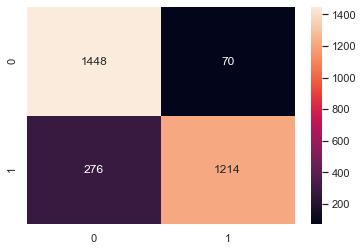

In [ ]:
#Checking the predictions in the training dataset
y_predict_train = logreg.predict(X_train)
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d")

The result is telling us that we have 2662 (1448+1214) correct predictions and 346 (276+70) incorrect predictions in the training dataset.

In [ ]:
#Accuracy in the test dataset
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


<AxesSubplot:>

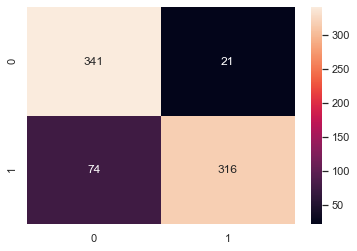

In [ ]:
#Checking the predictions in the test dataset
y_predict_train = logreg.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

The result is telling us that we have 657 (341+316) correct predictions and 95 (74+21) incorrect predictions in the test dataset.

In [ ]:
#Precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       362
           1       0.94      0.81      0.87       390

    accuracy                           0.87       752
   macro avg       0.88      0.88      0.87       752
weighted avg       0.88      0.87      0.87       752



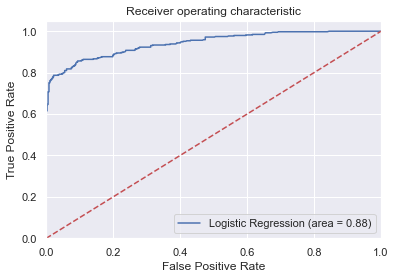

In [ ]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

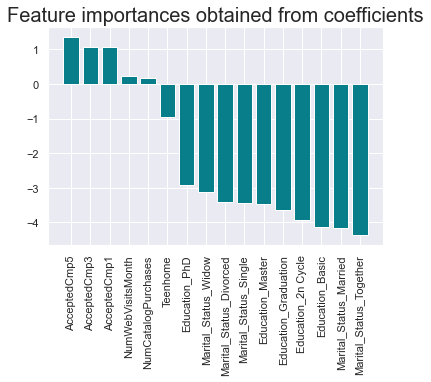

In [ ]:
# logistic regression for feature importance
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

The larger the coefficient is (in both positive and negative direction), the more influence it has on a prediction.

<a id='references'></a>
## References
>https://towardsdatascience.com/3-essential-ways-to-calculate-feature-importance-in-python-2f9149592155 <br>
https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8 <br>
https://www.datacamp.com/community/tutorials/introduction-customer-segmentation-python

<a id='references'></a>
## Thank you!

In [ ]:
!jupyter nbconvert JEAN_CRUZ_iFood_Data_Analyst_Case.ipynb --to slides --post serve --template output_toggle.tpl

[NbConvertApp] Converting notebook JEAN_CRUZ_iFood_Data_Analyst_Case.ipynb to slides
[NbConvertApp] Writing 780134 bytes to JEAN_CRUZ_iFood_Data_Analyst_Case.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/JEAN_CRUZ_iFood_Data_Analyst_Case.slides.html
Use Control-C to stop this server
